In [72]:
import gym
import logging 
import math
import numpy as np
import random as rng
import torch

from itertools import count
from copy import deepcopy
from typing import NamedTuple
from torch.nn import functional as F
from torch import nn
from torch.autograd import Variable
from itertools import product
from matplotlib import pyplot as plt

gym.logger.set_level(40)

In [51]:
env = gym.make('FrozenLake-v0')

In [5]:
MDP = dict
State = int
Action = int
Value = float

### Asynchronous Q-Iteration 

Repeat Until Q converges:
- Sample $s$, $a$ from all state action pairs:  
    - $$Q(s,a) \leftarrow \mathbb{E}_{s' \sim \mathcal{P}_{s}^{a}} \bigl[ \mathcal{R}_s^{a} + \gamma Q(s', \pi(s')) \bigr]$$

In [6]:
def calculate_value_of_state_action(
    markov_decision_process: MDP,
    state: State,
    action: Action,
    state_values: np.array,
    discount: float
) -> Value:
    """
    Calculates expected value associated with being in a state and taking action
    """
    qvalue = 0
    for transition_probability, next_state, reward, done in markov_decision_process[state][action]:
        next_state_value = 0 if done else state_values[next_state] 
        qvalue += transition_probability * (reward + discount*next_state_value)
    return qvalue

#### Implment asynchronous Q-Iteration 

Note: What is _asynchronous_ about it?

In [16]:
correct_values = np.array(
    [0.542, 0.499, 0.471, 0.457, 0.558, 0., 0.358, 0., 0.592, 0.643, 0.615, 0., 0., 0.742, 0.863, 0.]
)

assert np.sum(np.abs(async_qiteration.Q.max(axis=1) - correct_values)) < 0.01

### Tabular Q-Learning
What do you do when you take away the dynamics model? 

- **Step 1: Initialize Q, Initialize $\alpha$**
- **Step 2: Repeat Until Converge**
    - Pick action, Get Next State
    - Calculate Reward based on Next State
        - if  next state is terminal:
            $Target = r_T$ 
        - else:
        $Target = R(s, a, s') + \gamma \max_{a'} Q(s', a')$
    - $Q(s, a) \leftarrow (1 - \alpha)Q(s, a) + \alpha*Target$
    
Note: How do you pick an action to maximize exploration and exploitation? $\epsilon$-greedy

**#TODO Exercise for the Reader: Implement Q-Learning on FrozenLake**

### Deep Q-Learning 

#### Enviornment 

In [56]:
env = gym.make('CartPole-v0')

#### Hyperparameters 

In [73]:
BUFFER_SIZE = 10**6
BATCH_SIZE = 128
GAMMA = 0.99
TARGET_UPDATE = 100
EPS_START = 0.999
EPS_END = 0.01
EPS_DECAY = 200

#### Implement Experience Replay 

#### $\epsilon$-Greedy

#### Build Neural Network Q-Function

#### Create Training Loop

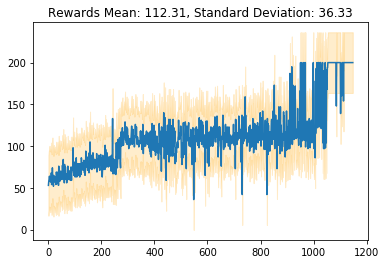

In [82]:
rewards = np.array(episode_rewards)
rewards_mean = np.mean(rewards)
rewards_std = np.std(rewards)


plt.plot(episode_rewards)
plt.fill_between(
    range(len(rewards)),
    rewards-rewards_std, 
    rewards+rewards_std, 
    color='orange', 
    alpha=0.2
)
plt.title(
    'Rewards Mean: {:.2f}, Standard Deviation: {:.2f}'.format(
        rewards_mean,
        rewards_std
    )
)
plt.show()